## Librerias a utilizar
 - Pandas es utilizado para la carga y manipulacion de datos
 - Matplotlib es utilizado para realizar graficos
 - Numpy es utilizado para realizar calculos matematicos

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

### Carga de archivo
Para la carga de archivos se utiliza el comando ***read_csv()*** que es parte de la libreria *Pandas*

In [20]:
df = pd.read_csv('BD1.csv')

### Funcion *group()*
La funcion *group()* es utilizada para realizar la nueva clasificacion de lugares de compra

In [21]:
def group(i):
    if i == '':
        return np.nan
    elif i == 4 or i == 5 or i == 24:
        return 5
    elif  i == 2 or i == 3:
        return 4
    elif i == 6 or i == 13 or i == 23 or i == 31 or i == 32 or i == 99:
        return 3
    elif i == 14 or i == 17 or i == 18 or i == 20:
        return 2
    else:
        return 1

### Funciones *lc()* y *fc()*
 - La funcion *lc()* es utilizada para cambiar los codigos de lugar de compra por el lugar de compra
 - La funcion *fc()* es utilizada para cambiar los codigos de frecuencia de compra por la frecuencia de compra

In [22]:
def lc(i):
    if i == 1:
        return 'Supermercado'
    elif i == 2:
        return 'Mayorista'
    elif i == 3:
        return 'Minorista'
    elif i == 4:
        return 'Frigorifico'
    else:
        return 'Tienda'

def fc(i):
    if i == 1:
        return 'Diaria'
    elif i == 2:
        return '2-3 v/sem'
    elif i == 3:
        return '4-6 v/sem'
    elif i == 4:
        return '1 v/sem'
    elif i == 5:
        return 'Quincenal'
    elif i == 6:
        return 'Mensual'
    elif i == 7:
        return 'Bimensual'
    elif i == 8:
        return 'Trimestral'
    elif i == 9:
        return 'Semestral'
    else:
        return 'Anual'

### Funcion *pltfig()*
La funcion *pltfig()* es utilizada para realizar dos graficos, de tipo histograma o , uno al lado del otro. <br />
Los parametros de entrada son los siguientes:
 - Columna de datos 1
 - Columna de datos 2
 - Eje X ('lc' para lugar de compra y 'fc' para frecuencia de compra)
 - Tipo de grafico ('bar' para histograma y 'pie' para un pie)
 - Colores del grafico de barras o pie

In [23]:
def subcategorybar(X, vals, width=0.8, leg = ['Municipio 1', 'Municipio 2'], title='', ya = 'P'):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    plt.legend(leg)
    plt.title(title) if title!='' else None
    plt.ylabel('Frecuencia (personas)') if ya == 'F' else plt.ylabel('Porcentaje (%)')
    plt.show()

def pltfig(df1, df2, xaxis=0, kind='bar', colorpie=['orange', 'mediumturquoise'], plot=True):
    ser_1 = df1.value_counts(normalize=False).sort_index()
    freq_1 = ser_1.to_numpy()
    per_1 = freq_1 / np.sum(freq_1) * 100
    cod_1 = ser_1.index.to_numpy()    
    ser_2 = df2.value_counts(normalize=False).sort_index()
    freq_2 = ser_2.to_numpy()
    per_2 = freq_2 / np.sum(freq_2) * 100
    cod_2 = ser_2.index.to_numpy()
    if xaxis == 'lc':
        xaxis_1 = [lc(x) for x in cod_1]
        xaxis_2 = [lc(x) for x in cod_2]
    elif xaxis == 'fc':
        xaxis_1 = [fc(x) for x in cod_1]
        xaxis_2 = [fc(x) for x in cod_2]
    else:
        xaxis_1 = cod_1
        xaxis_2 = cod_2
    if plot==True:
        if kind=='bar':
            rcParams['figure.figsize']=15,5
            plt.subplot(1, 2, 1)
            plt.title('Municipio 1', fontsize=15)
            plt.ylabel('Porcentaje (%)', fontsize=12)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.bar(xaxis_1, per_1)
            plt.subplot(1, 2, 2)
            plt.title('Municipio 2', fontsize=15)
            plt.ylabel('Porcentaje (%)', fontsize=12)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.bar(xaxis_2, per_2)
            plt.show()
        else:
            rcParams['figure.figsize']=15,5
            plt.subplot(1,2,1)
            plt.title('Municipio 1')
            n_1 = plt.pie(freq_1, colors=colorpie, startangle=90, autopct='%1.1f%%')
            plt.legend(n_1[0], xaxis_1, loc="best")
            plt.axis('equal')
            plt.tight_layout()
            plt.subplot(1,2,2)
            plt.title('Municipio 2')
            n_2 = plt.pie(freq_2, colors=colorpie, startangle=90, autopct='%1.1f%%')
            plt.legend(n_2[0], xaxis_2, loc="best")
            plt.axis('equal')
            plt.tight_layout()
            plt.show()
    return freq_1, per_1, cod_1, freq_2, per_2, cod_2

def nobo(ocod, cod, f):
    for i in range(len(ocod)):
        if (ocod[i] in cod):
            None
        else:
            f = np.insert(f, i, 0)
    return f

def normal(cod1, f1, p1, cod2, f2, p2, xaxis='lc'):    
    cod = np.unique(np.concatenate((cod1, cod2), 0)) if xaxis == 'fc' else np.array([1, 2, 3, 4, 5])
    cod = cod.astype('int')
    f1 = nobo(cod, cod1, f1)
    p1 = nobo(cod, cod1, p1)
    f2 = nobo(cod, cod2, f2)
    p2 = nobo(cod, cod2, p2)
    if xaxis == 'lc':
        names = [lc(x) for x in cod]
    elif xaxis == 'fc':
        names = [fc(x) for x in cod]
    else:
        names = cod
    return f1, p1, f2, p2, cod, names

In [24]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

### Nueva Codificacion de los lugares de compra
| Lugar de compra | Cod. |
|-----------------|:----:|
| Supermercado    |   1  |
| Mayorista       |   2  |
| Minorista       |   3  |
| Frigorifico     |   4  |
| Tienda          |   5  | 

Utilizando la funcion group() se reemplazarn los codigos de lugar de compra actuales por los codigos de la nueva agrupacion

In [25]:
lugarcompra = list(df[df.columns[53::5]])
df[lugarcompra] = df[lugarcompra].fillna(value='')
display(df[lugarcompra].head())
pd.options.mode.chained_assignment = None
for j in lugarcompra:
    for i in range(len(df[j])):
        val = df[j][i]
        rval = group(val)
        df[j][i] = rval

display(df[lugarcompra].head())

,"3.4. ¿Comunmente, dónde compra el alimento? (Carne de res)","3.4. ¿Comunmente, dónde compra el alimento? (Carne de cerdo)","3.4. ¿Comunmente, dónde compra el alimento? (Carnes procesadas)","3.4. ¿Comunmente, dónde compra el alimento? (Pescados)","3.4. ¿Comunmente, dónde compra el alimento? (Pollo)","3.4. ¿Comunmente, dónde compra el alimento? (Fresa)","3.4. ¿Comunmente, dónde compra el alimento? (Papaya)","3.4. ¿Comunmente, dónde compra el alimento? (Banano)","3.4. ¿Comunmente, dónde compra el alimento? (Manzana)","3.4. ¿Comunmente, dónde compra el alimento? (Mandarina)",...,"3.4. ¿Comunmente, dónde compra el alimento? (Harina de maíz)","3.4. ¿Comunmente, dónde compra el alimento? (Pasta)","3.4. ¿Comunmente, dónde compra el alimento? (Azúcar)","3.4. ¿Comunmente, dónde compra el alimento? (Sal)","3.4. ¿Comunmente, dónde compra el alimento? (Chocolate)","3.4. ¿Comunmente, dónde compra el alimento? (Café)","3.4. ¿Comunmente, dónde compra el alimento? (Panela)","3.4. ¿Comunmente, dónde compra el alimento? (Pan)","3.4. ¿Comunmente, dónde compra el alimento? (Galletas)","3.4. ¿Comunmente, dónde compra el alimento? (Agua)"
0,2,2,,9,,,9,9,13,13,...,1,,1,1,1,1,1,,,
1,2,2,,13,13,6,6,,,6,...,13,13,13,13,13,13,13,5,5,
2,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,,13,5,5,
3,2,,,,2,,,13,13,13,...,,9,9,9,9,9,9,5,,
4,,,,11,11,13,13,13,13,13,...,,16,16,16,,16,,,16,1


,"3.4. ¿Comunmente, dónde compra el alimento? (Carne de res)","3.4. ¿Comunmente, dónde compra el alimento? (Carne de cerdo)","3.4. ¿Comunmente, dónde compra el alimento? (Carnes procesadas)","3.4. ¿Comunmente, dónde compra el alimento? (Pescados)","3.4. ¿Comunmente, dónde compra el alimento? (Pollo)","3.4. ¿Comunmente, dónde compra el alimento? (Fresa)","3.4. ¿Comunmente, dónde compra el alimento? (Papaya)","3.4. ¿Comunmente, dónde compra el alimento? (Banano)","3.4. ¿Comunmente, dónde compra el alimento? (Manzana)","3.4. ¿Comunmente, dónde compra el alimento? (Mandarina)",...,"3.4. ¿Comunmente, dónde compra el alimento? (Harina de maíz)","3.4. ¿Comunmente, dónde compra el alimento? (Pasta)","3.4. ¿Comunmente, dónde compra el alimento? (Azúcar)","3.4. ¿Comunmente, dónde compra el alimento? (Sal)","3.4. ¿Comunmente, dónde compra el alimento? (Chocolate)","3.4. ¿Comunmente, dónde compra el alimento? (Café)","3.4. ¿Comunmente, dónde compra el alimento? (Panela)","3.4. ¿Comunmente, dónde compra el alimento? (Pan)","3.4. ¿Comunmente, dónde compra el alimento? (Galletas)","3.4. ¿Comunmente, dónde compra el alimento? (Agua)"
0,4,4,NaN,1,NaN,NaN,1,1,3,3,...,1,NaN,1,1,1,1,1,NaN,NaN,NaN
1,4,4,NaN,3,3,3,3,NaN,NaN,3,...,3,3,3,3,3,3,3,5,5,NaN
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,NaN,3,5,5,NaN
3,4,NaN,NaN,NaN,4,NaN,NaN,3,3,3,...,NaN,1,1,1,1,1,1,5,NaN,NaN
4,NaN,NaN,NaN,1,1,3,3,3,3,3,...,NaN,1,1,1,NaN,1,NaN,NaN,1,1


### Agrupacion por municipios
En el set de datos existen datos de dos municipio, 25126 y 25175, a partir de este punto se realiza un analisis a estos dos municipios por separado

In [26]:
m1 = df[df['1.3. Municipio']==25126]
m2 = df[df['1.3. Municipio']==25175]

### Porcentaje de personas en cada estrato social

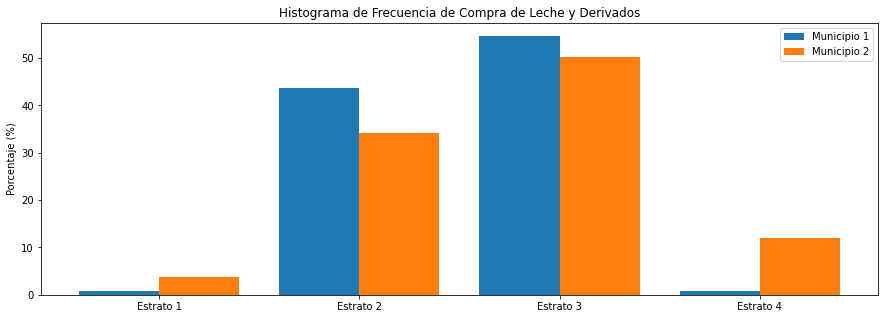

In [63]:
rcParams['figure.figsize']=15,5
ser_1 = m1['2.2. ¿Cuál es el estrato socioeconómico que aparece en su recibo de la luz?']
ser_2 = m2['2.2. ¿Cuál es el estrato socioeconómico que aparece en su recibo de la luz?']
f1, p1, cod1, f2, p2, cod2 =  pltfig(ser_1 , ser_2, plot=False)
#f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2,)
subcategorybar(cod1, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Leche y Derivados')

### Agrupacion 
Se realizo una agrupacion segun las 10 categorias mencionadas en el documento de la encuesta

In [64]:
preguntas = np.array(list(df))
np.where(preguntas =='3.3. ¿Con qué frecuencia compra el alimento? (Carne de res)')
#print (preguntas)

(array([52], dtype=int32),)

In [65]:
carnes = [m1[m1.columns[51:76]], m2[m2.columns[51:76]], df[df.columns[51:76]]]
frutas = [m1[m1.columns[76:181]], m2[m2.columns[76:181]], df[df.columns[76:181]]]
verduras = [m1[m1.columns[181:256]], m2[m2.columns[181:256]], df[df.columns[181:256]]]
tuberculos = [m1[m1.columns[256:281]], m2[m2.columns[256:281]], df[df.columns[256:281]]]
lacteos = [m1[m1.columns[281:296]], m2[m2.columns[281:296]], df[df.columns[281:296]]]
huevos = [m1[m1.columns[296:301]], m2[m2.columns[296:301]], df[df.columns[296:301]]]
cereales = [m1[m1.columns[301:321]], m2[m2.columns[301:321]], df[df.columns[301:321]]]
abarrotes = [m1[m1.columns[321:371]], m2[m2.columns[321:371]], df[df.columns[321:371]]]
panaderia = [m1[m1.columns[371:381]], m2[m2.columns[371:381]], df[df.columns[371:381]]]
bebidas = [m1[m1.columns[381:386]], m2[m2.columns[381:386]]]

## Lugar de Compra
A continuacion se realizan histogramas para determinar los lugares de compra mas populares de acuerdo a las categorias mencionadas anteriormente

### Carne de Res

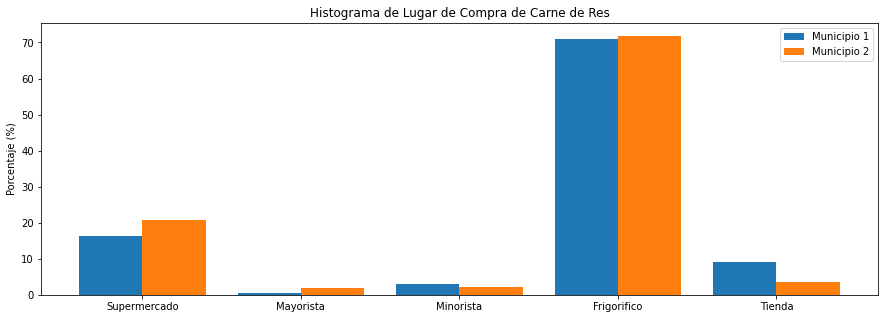

In [66]:
res_1 = carnes[0][carnes[0].columns[2]]
res_2 = carnes[1][carnes[1].columns[2]]
res = carnes[2][carnes[2].columns[2]]
f1r, p1r, cod1r, f2r, p2r, cod2r =  pltfig(res_1, res_2, 'lc', plot=False)
f1r, p1r, f2r, p2r, codr, namesr = normal(cod1r, f1r, p1r, cod2r, f2r, p2r, 'lc')
subcategorybar(namesr, [p1r, p2r], ya='P', title='Histograma de Lugar de Compra de Carne de Res')

### Carne de Cerdo

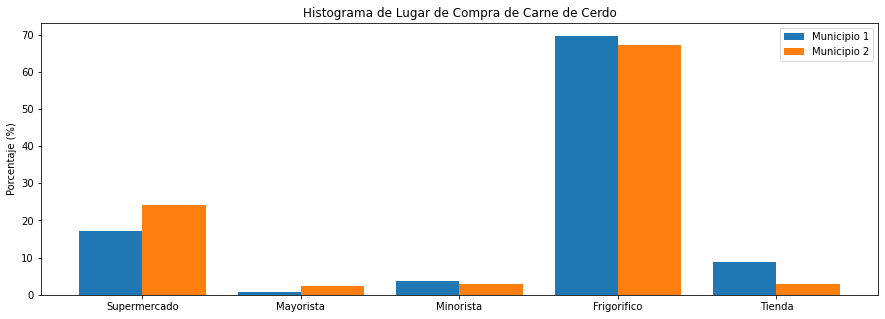

In [67]:
cerdo_1 = carnes[0][carnes[0].columns[7]]
cerdo_2 = carnes[1][carnes[1].columns[7]]
cerdo = carnes[2][carnes[2].columns[7]]
f1c, p1c, cod1c, f2c, p2c, cod2c =  pltfig(cerdo_1,cerdo_2, 'lc', plot=False)
f1c, p1c, f2c, p2c, codc, namesc = normal(cod1c, f1c, p1c, cod2c, f2c, p2c, 'lc')
subcategorybar(namesc, [p1c, p2c], ya='P', title='Histograma de Lugar de Compra de Carne de Cerdo')

### Carnes Procesadas

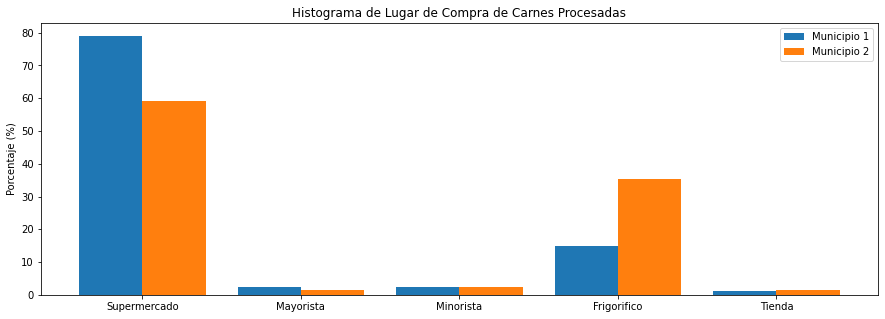

In [68]:
procesadas_1 = carnes[0][carnes[0].columns[12]]
procesadas_2 = carnes[1][carnes[1].columns[12]]
procesadas = carnes[2][carnes[2].columns[12]]
f1p, p1p, cod1p, f2p, p2p, cod2p =  pltfig(procesadas_1,procesadas_2, 'lc', plot=False)
f1p, p1p, f2p, p2p, codp, namesp = normal(cod1p, f1p, p1p, cod2p, f2p, p2p, 'lc')
subcategorybar(namesp, [p1p, p2p], ya='P', title='Histograma de Lugar de Compra de Carnes Procesadas')

### Pescado

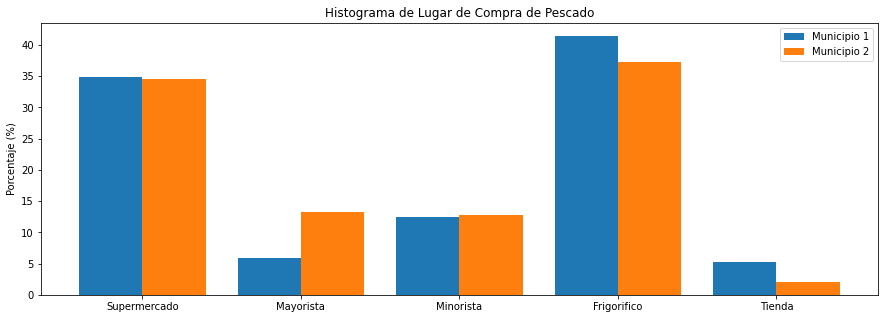

In [69]:
pescado_1 = carnes[0][carnes[0].columns[17]]
pescado_2 = carnes[1][carnes[1].columns[17]]
pescado = carnes[2][carnes[2].columns[17]]
f1pe, p1pe, cod1pe, f2pe, p2pe, cod2pe =  pltfig(pescado_1,pescado_2, 'lc', plot=False)
f1pe, p1pe, f2pe, p2pe, codpe, namespe = normal(cod1pe, f1pe, p1pe, cod2pe, f2pe, p2pe, 'lc')
subcategorybar(namespe, [p1pe, p2pe], ya='P', title='Histograma de Lugar de Compra de Pescado')

### Carne de Pollo

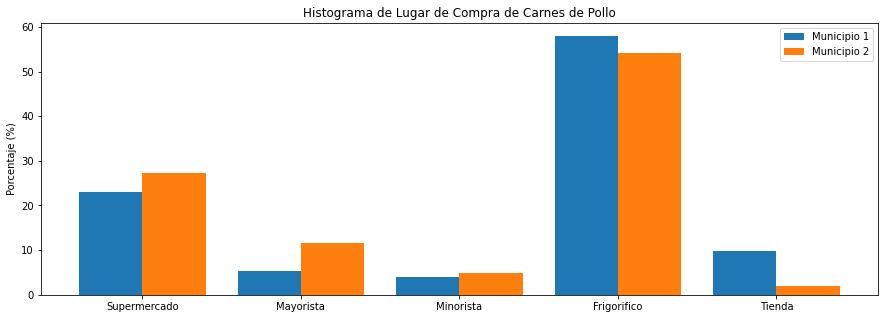

In [70]:
pollo_1 = carnes[0][carnes[0].columns[22]]
pollo_2 = carnes[1][carnes[1].columns[22]]
pollo = carnes[2][carnes[2].columns[22]]
f1po, p1po, cod1po, f2po, p2po, cod2po =  pltfig(pollo_1,pollo_2, 'lc', plot=False)
f1po, p1po, f2po, p2po, codpo, namespo = normal(cod1po, f1po, p1po, cod2po, f2po, p2po, 'lc')
subcategorybar(namespo, [p1po, p2po], ya='P', title='Histograma de Lugar de Compra de Carnes de Pollo')

### Histograma de Lugar de Compra de toda la Poblacion

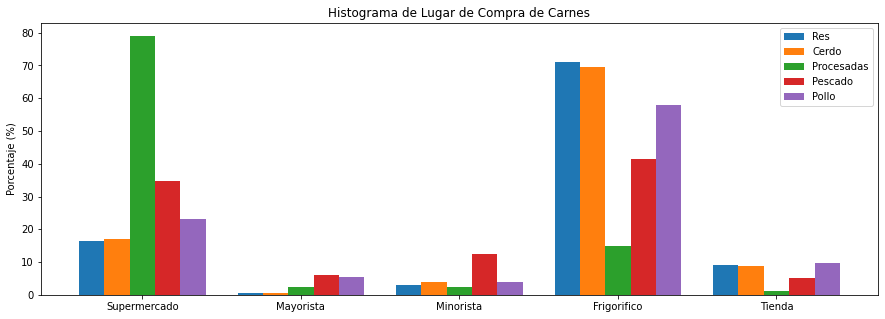

In [71]:
subcategorybar(namesr, [p1r, p1c, p1p, p1pe, p1po], ya='P', title='Histograma de Lugar de Compra de Carnes', leg=['Res', 'Cerdo', 'Procesadas', 'Pescado', 'Pollo'])

### Frutas

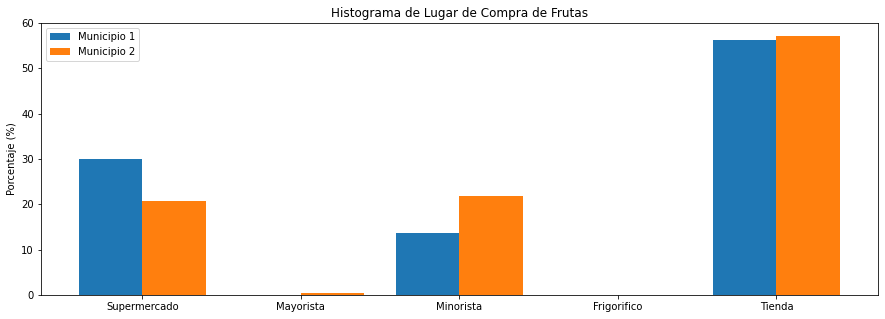

In [72]:
comprafruta_1 = frutas[0][frutas[0].columns[2::5]].mode(axis = 'columns',numeric_only = False)
comprafruta_2 = frutas[1][frutas[1].columns[2::5]].mode(axis = 'columns',numeric_only = False)
f_1 = comprafruta_1[0].squeeze()
f_2 = comprafruta_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(f_1,f_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Frutas')

### Verduras

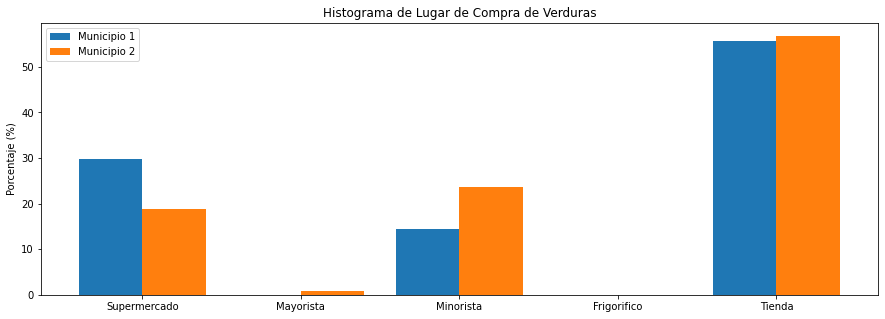

In [73]:
compraverdura_1 = verduras[0][verduras[0].columns[2::5]].mode(axis = 'columns', numeric_only=False)
compraverdura_2 = verduras[1][verduras[1].columns[2::5]].mode(axis = 'columns', numeric_only=False)
v_1 = compraverdura_1[0].squeeze()
v_2 = compraverdura_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(v_1, v_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Verduras')

### Tuberculos

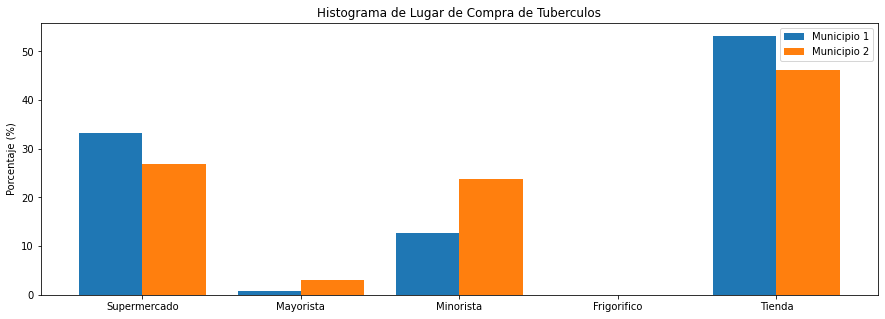

In [74]:
compratuberculos_1 = tuberculos[0][tuberculos[0].columns[2::5]].mode(axis = 'columns',numeric_only=False)
compratuberculos_2 = tuberculos[1][tuberculos[1].columns[2::5]].mode(axis = 'columns',numeric_only=False)
t_1 = compratuberculos_1[0].squeeze()
t_2 = compratuberculos_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(t_1, t_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Tuberculos')

### Leche y derivados

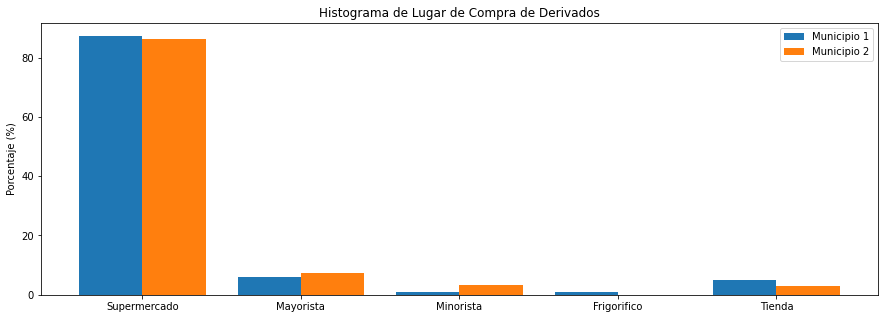

In [75]:
compralacteos_1 = lacteos[0][lacteos[0].columns[2::5]].mode(axis = 'columns',numeric_only = False)
compralacteos_2 = lacteos[1][lacteos[1].columns[2::5]].mode(axis = 'columns',numeric_only = False)
l_1 = compralacteos_1[0].squeeze()
l_2 = compralacteos_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(l_1, l_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Derivados')

### Huevo

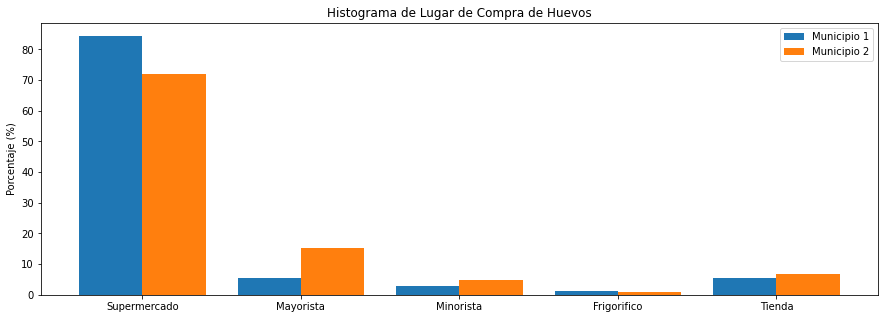

In [76]:
huevo_1 = huevos[0][huevos[0].columns[2]]
huevo_2 = huevos[1][huevos[1].columns[2]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(huevo_1, huevo_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Huevos')

### Cereales 

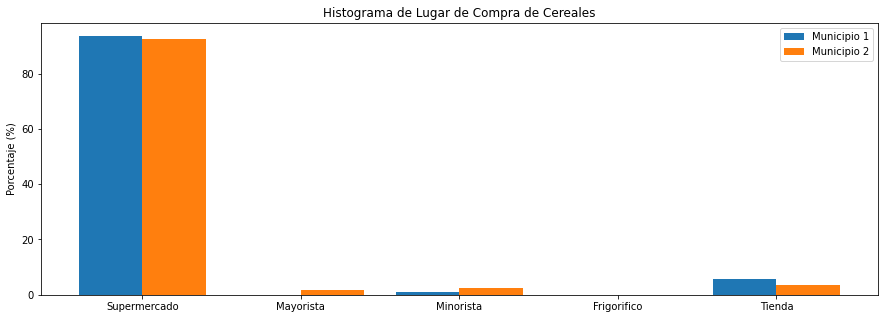

In [77]:
compracereales_1 = cereales[0][cereales[0].columns[2::5]].mode(axis = 'columns',numeric_only=False)
compracereales_2 = cereales[1][cereales[1].columns[2::5]].mode(axis = 'columns',numeric_only=False)
c_1 = compracereales_1[0].squeeze()
c_2 = compracereales_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(c_1, c_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Cereales')

### Abarrotes

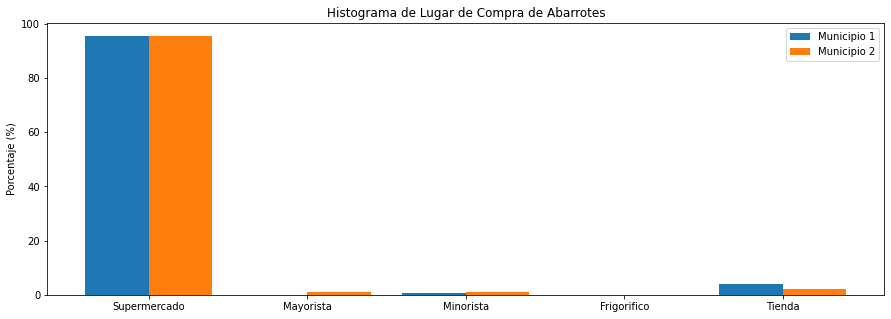

In [78]:
compraabarrotes_1 = abarrotes[0][abarrotes[0].columns[2::5]].mode(axis = 'columns',numeric_only=False)
compraabarrotes_2 = abarrotes[1][abarrotes[1].columns[2::5]].mode(axis = 'columns',numeric_only=False)
a_1 = compraabarrotes_1[0].squeeze()
a_2 = compraabarrotes_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(a_1, a_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Abarrotes')

### Pan

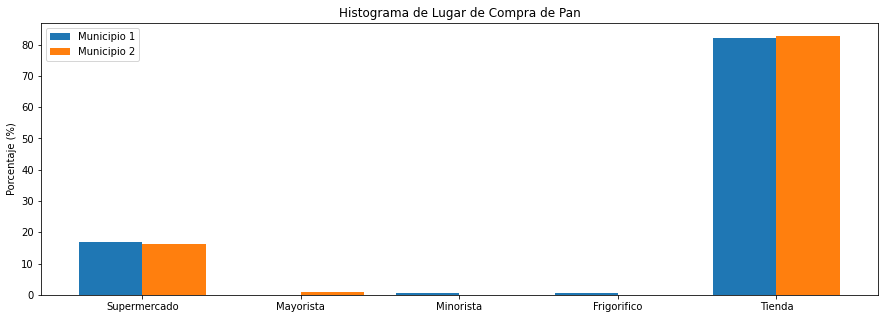

In [79]:
pan_1 = panaderia[0][panaderia[0].columns[2]]
pan_2 = panaderia[1][panaderia[1].columns[2]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(pan_1, pan_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Pan')

### Galletas

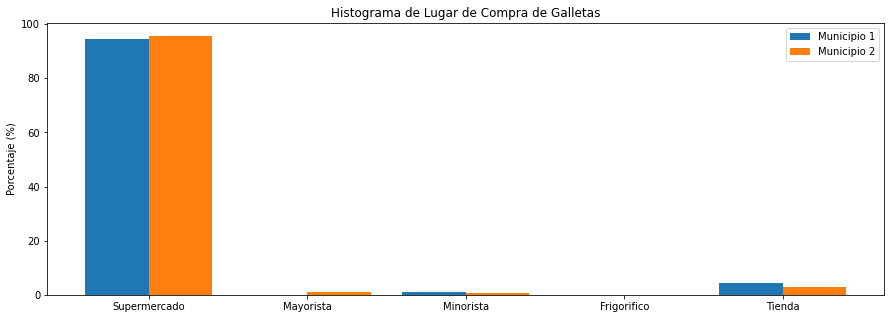

In [80]:
galletas_1 = panaderia[0][panaderia[0].columns[7]]
galletas_2 = panaderia[1][panaderia[1].columns[7]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(galletas_1, galletas_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Galletas')

### Bebidas

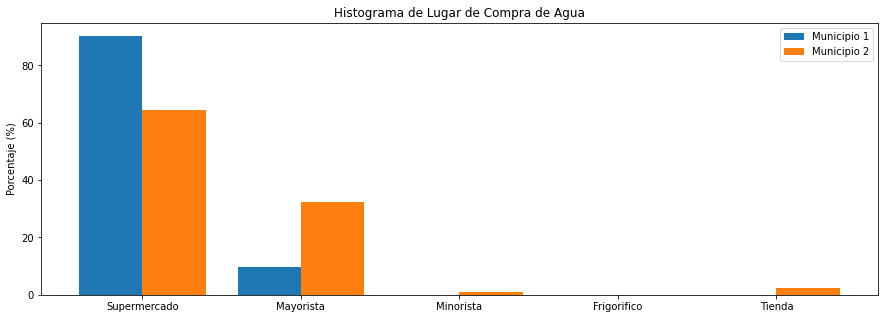

In [81]:
agua_1 = bebidas[0][bebidas[0].columns[2]]
agua_2 = bebidas[1][bebidas[1].columns[2]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(agua_1, agua_2, 'lc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'lc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Lugar de Compra de Agua')

## Frecuencia de Compra

### Carne de Res


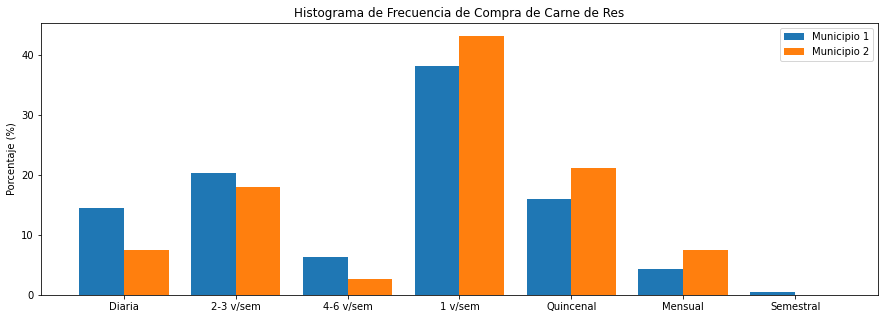

In [82]:
res_1 = carnes[0][carnes[0].columns[1]]
res_2 = carnes[1][carnes[1].columns[1]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(res_1, res_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Carne de Res')

### Carne de Cerdo

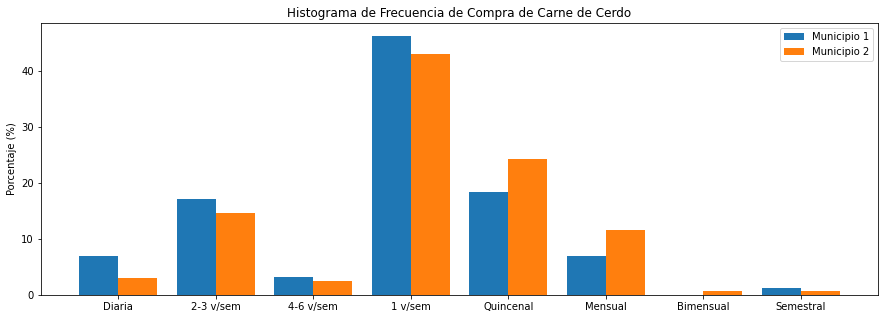

In [83]:
cerdo_1 = carnes[0][carnes[0].columns[6]]
cerdo_2 = carnes[1][carnes[1].columns[6]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(cerdo_1, cerdo_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Carne de Cerdo')

### Carnes Procesadas

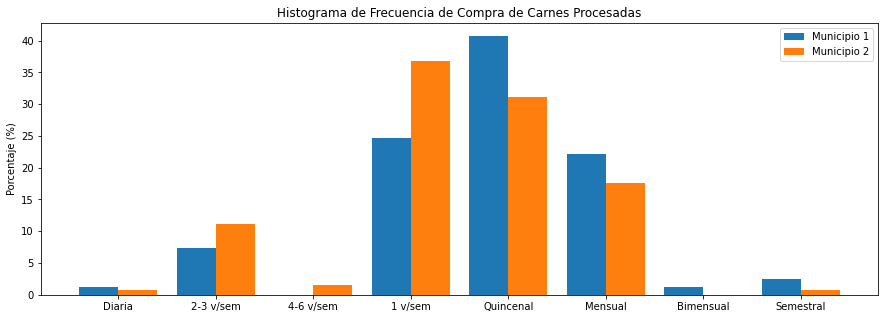

In [84]:
procesadas_1 = carnes[0][carnes[0].columns[11]]
procesadas_2 = carnes[1][carnes[1].columns[11]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(procesadas_1, procesadas_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Carnes Procesadas')

### Pescado

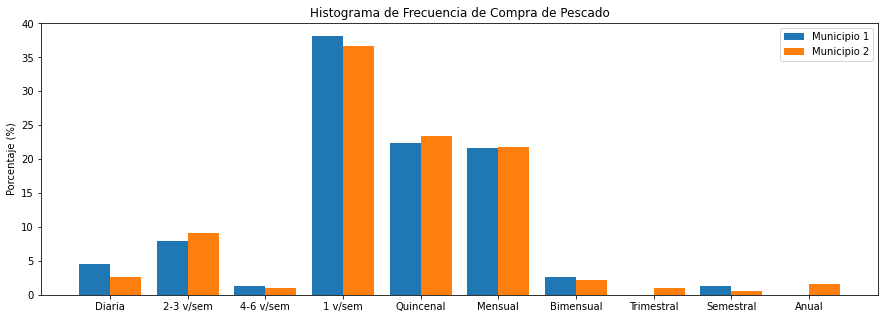

In [85]:
pescado_1 = carnes[0][carnes[0].columns[16]]
pescado_2 = carnes[1][carnes[1].columns[16]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(pescado_1, pescado_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Pescado')

### Carne de Pollo

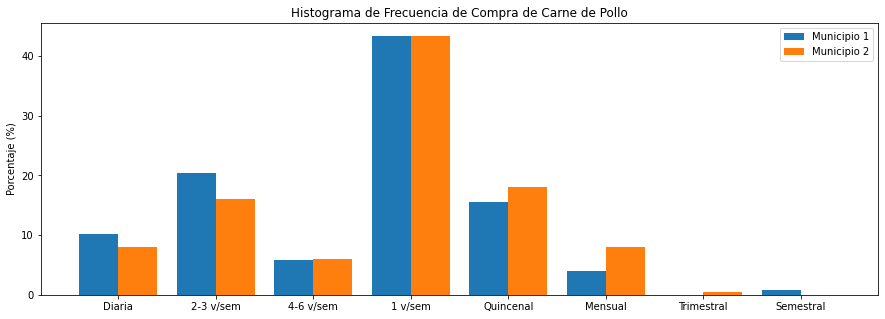

In [86]:
pollo_1 = carnes[0][carnes[0].columns[21]]
pollo_2 = carnes[1][carnes[1].columns[21]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(pollo_1 , pollo_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Carne de Pollo')

### Frutas

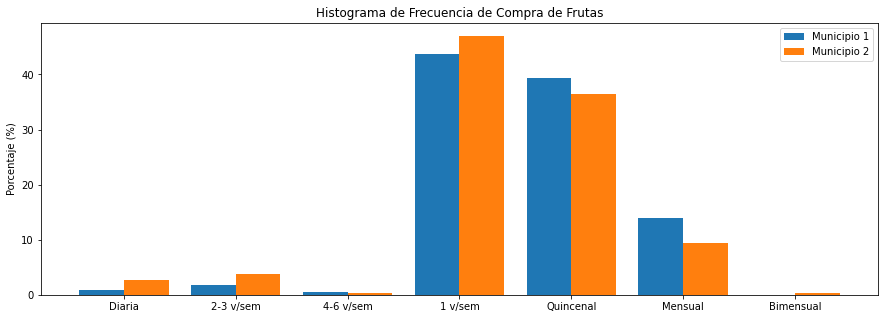

In [87]:
comprafruta_1 = frutas[0][frutas[0].columns[1::5]].mode(axis = 'columns',numeric_only = False)
comprafruta_2 = frutas[1][frutas[1].columns[1::5]].mode(axis = 'columns',numeric_only = False)
f_1 = comprafruta_1[0].squeeze()
f_2 = comprafruta_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(f_1 , f_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Frutas')

### Verduras

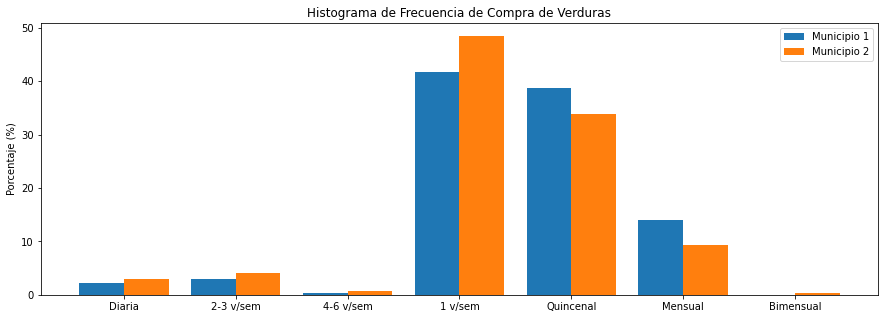

In [88]:
compraverdura_1 = verduras[0][verduras[0].columns[1::5]].mode(axis = 'columns', numeric_only=False)
compraverdura_2 = verduras[1][verduras[1].columns[1::5]].mode(axis = 'columns', numeric_only=False)
v_1 = compraverdura_1[0].squeeze()
v_2 = compraverdura_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(v_1 , v_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Verduras')

### Tuberculos

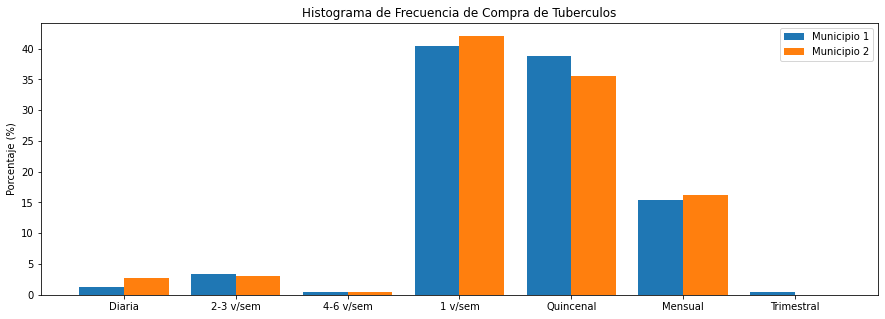

In [89]:
compratuberculos_1 = tuberculos[0][tuberculos[0].columns[1::5]].mode(axis = 'columns',numeric_only=False)
compratuberculos_2 = tuberculos[1][tuberculos[1].columns[1::5]].mode(axis = 'columns',numeric_only=False)
t_1 = compratuberculos_1[0].squeeze()
t_2 = compratuberculos_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(t_1 , t_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Tuberculos')

### Leche y derivados

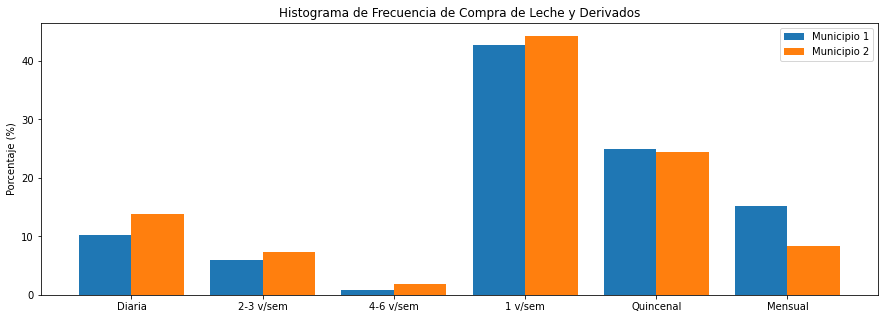

In [90]:
compralacteos_1 = lacteos[0][lacteos[0].columns[1::5]].mode(axis = 'columns',numeric_only = False)
compralacteos_2 = lacteos[1][lacteos[1].columns[1::5]].mode(axis = 'columns',numeric_only = False)
l_1 = compralacteos_1[0].squeeze()
l_2 = compralacteos_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(l_1 , l_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Leche y Derivados')

### Huevo

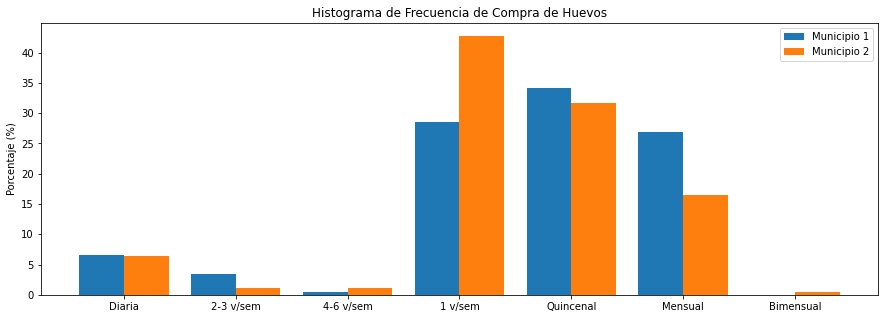

In [91]:
huevo_1 = huevos[0][huevos[0].columns[1]]
huevo_2 = huevos[1][huevos[1].columns[1]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(huevo_1 , huevo_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Huevos')

### Cereales 

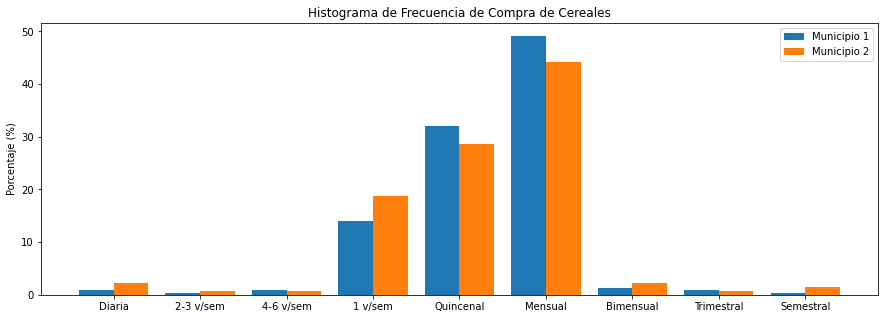

In [92]:
compracereales_1 = cereales[0][cereales[0].columns[1::5]].mode(axis = 'columns',numeric_only=False)
compracereales_2 = cereales[1][cereales[1].columns[1::5]].mode(axis = 'columns',numeric_only=False)
c_1 = compracereales_1[0].squeeze()
c_2 = compracereales_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(c_1 , c_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Cereales')

### Abarrotes

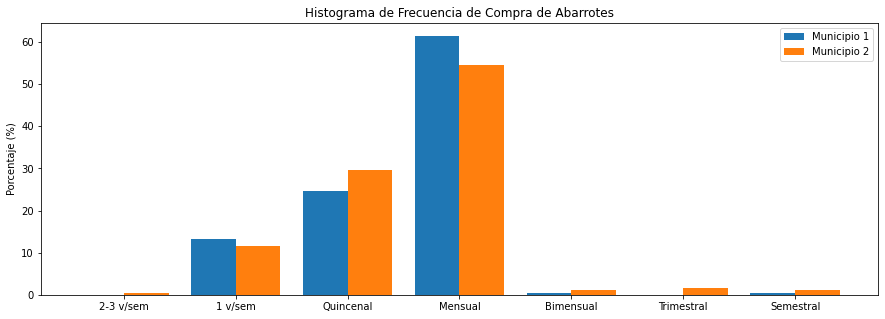

In [93]:
compraabarrotes_1 = abarrotes[0][abarrotes[0].columns[1::5]].mode(axis = 'columns',numeric_only=False)
compraabarrotes_2 = abarrotes[1][abarrotes[1].columns[1::5]].mode(axis = 'columns',numeric_only=False)
a_1 = compraabarrotes_1[0].squeeze()
a_2 = compraabarrotes_2[0].squeeze()
f1, p1, cod1, f2, p2, cod2 =  pltfig(a_1 , a_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Abarrotes')

### Pan

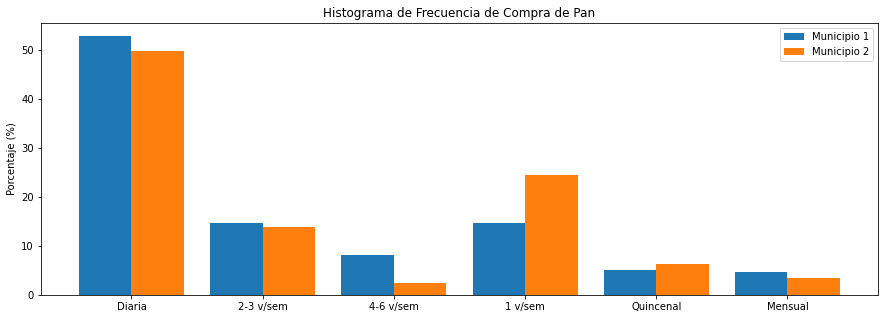

In [94]:
pan_1 = panaderia[0][panaderia[0].columns[1]]
pan_2 = panaderia[1][panaderia[1].columns[1]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(pan_1 , pan_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Pan')

### Galletas

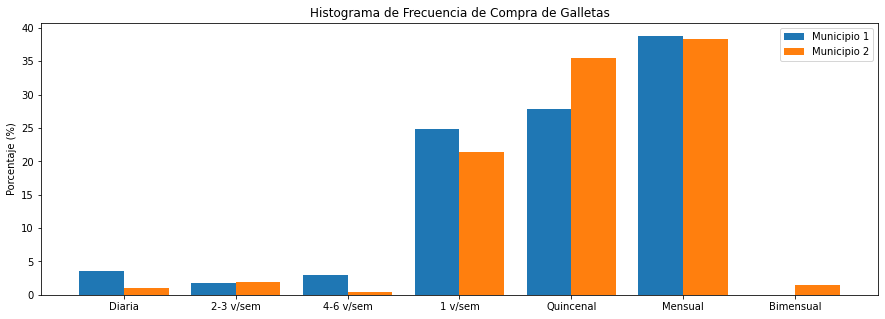

In [95]:
galletas_1 = panaderia[0][panaderia[0].columns[6]]
galletas_2 = panaderia[1][panaderia[1].columns[6]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(galletas_1 , galletas_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Galletas')

### Bebidas

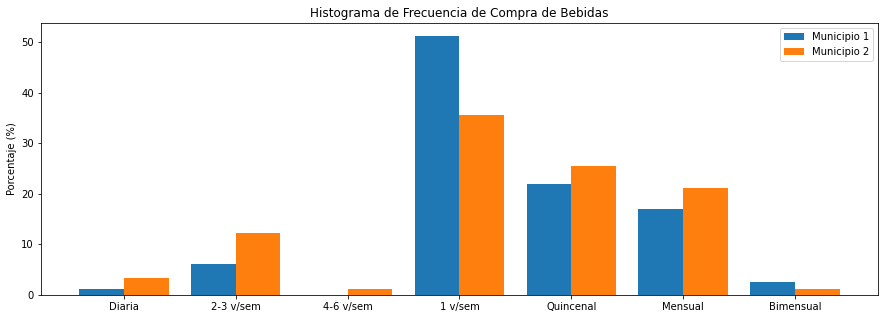

In [96]:
agua_1 = bebidas[0][bebidas[0].columns[1]]
agua_2 = bebidas[1][bebidas[1].columns[1]]
f1, p1, cod1, f2, p2, cod2 =  pltfig(agua_1 , agua_2, 'fc', plot=False)
f1, p1, f2, p2, cod, names = normal(cod1, f1, p1, cod2, f2, p2, 'fc')
subcategorybar(names, [p1, p2], ya='P', title='Histograma de Frecuencia de Compra de Bebidas')

### Consumo de Carne de la poblacion en general

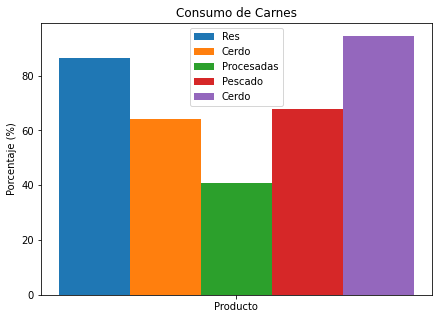

In [97]:
res = carnes[2][carnes[2].columns[0]]
cerdo = carnes[2][carnes[2].columns[5]]
proc = carnes[2][carnes[2].columns[10]]
pescado = carnes[2][carnes[2].columns[15]]
pollo = carnes[2][carnes[2].columns[20]]

fr, pr, codr, fce, pce, codce =  pltfig(res , cerdo, plot=False)
fp, pp, codp, fpe, ppe, codpe =  pltfig(proc , pescado, plot=False)
fpo, ppo, codpo, fr, pr, codr =  pltfig(pollo , res, plot=False)
rcParams['figure.figsize']=7,5
subcategorybar(['Producto'], [pr[1], pce[1], pp[1], ppe[1], ppo[1]], ya='P', title='Consumo de Carnes', leg=['Res', 'Cerdo', 'Procesadas', 'Pescado', 'Cerdo'])